In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

2025-03-25 11:59:46.129212: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.h5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 5

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            55 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,125 (4.39 KB)

 Trainable params: 1,125 (4.39 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 22s 759ms/step - accuracy: 0.2031 - loss: 1.7073
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2025 - loss: 1.6471 - val_accuracy: 0.3644 - val_loss: 1.5053
Epoch 2/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.2734 - loss: 1.5275
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2963 - loss: 1.5187 - val_accuracy: 0.4206 - val_loss: 1.3879
Epoch 3/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.2969 - loss: 1.4559
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3492 - loss: 1.4328 - val_accuracy: 0.4938 - val_loss: 1.2745
Epoch 4/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.3672 - loss: 1.3919
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3685 - loss: 1.3626 - val_accuracy: 0.5385 - val_loss: 1.1678
Epoch 5/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.4062 - loss: 1.3097
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4195 - loss: 1.2806 - val_accuracy: 0.5909 - val_loss: 1.0747
Epoch 6/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.3984 - loss: 1.2925
Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4465 - loss: 1.2279 - val_accuracy: 0.6541 - val_loss: 0.9948
Epoch 7/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.5547 - loss: 1.1042
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4899 - loss: 1.1597 - val_accuracy: 0.7265 - val_loss: 0.9283
Epoch 8/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.5625 - loss: 1.0617
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5242 - loss: 1.0999 - val_accuracy: 0.7304 - val_loss: 0.8748
Epoch 9/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.5000 - loss: 1.1152
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5219 - loss: 1.0946 - val_accuracy: 0.7427 - val_loss: 0.8264
Epoch 10/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.5078 - loss: 1.1025
Epoch 10: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5301 - loss: 1.0510 - val_accuracy: 0.7450 - val_loss: 0.7794
Epoch 11/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.6016 - loss: 0.9161
Epoch 11: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5466 - loss: 1.0147 - val_accuracy: 0.7504 - val_loss: 0.7518
Epoch 12/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.5703 - loss: 0.9661
Epoch 12: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5691 - loss: 0.9867 - val_accuracy: 0.7920 - val_loss: 0.7023
Epoch 13/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.6172 - loss: 0.9097
Epoch 13: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5798 - loss: 0.9707 - val_accuracy: 0.8760 - val_loss: 0.6759
Epoch 14/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.6641 - loss: 0.8386
Epoch 14: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6040 - loss: 0.9179 - val_accuracy: 0.8860 - val_loss: 0.6455
Epoch 15/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.5625 - loss: 0.9188
Epoch 15: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5926 - loss: 0.9338 - val_accuracy: 0.8968 - val_loss: 0.6197
Epoch 16/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.5859 - loss: 0.9589
Epoch 16: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5899 - loss: 0.9287 - val_accuracy: 0.9060 - val_loss: 0.6003
Epoch 17/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.6641 - loss: 0.8819
Epoch 17: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6267 - loss: 0.8961 - val_accuracy: 0.9153 - val_loss: 0.5744
Epoch 18/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.6094 - loss: 0.8672
Epoch 18: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6218 - loss: 0.8750 - val_accuracy: 0.9083 - val_loss: 0.5552
Epoch 19/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.5469 - loss: 1.0000
Epoch 19: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6393 - loss: 0.8726 - val_accuracy: 0.9183 - val_loss: 0.5214
Epoch 20/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.6953 - loss: 0.6949
Epoch 20: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6639 - loss: 0.8278 - val_accuracy: 0.9222 - val_loss: 0.5076
Epoch 21/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.6250 - loss: 0.8767
Epoch 21: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6631 - loss: 0.8191 - val_accuracy: 0.9214 - val_loss: 0.4924
Epoch 22/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.6250 - loss: 0.8456
Epoch 22: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6724 - loss: 0.8038 - val_accuracy: 0.9307 - val_loss: 0.4732
Epoch 23/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.6797 - loss: 0.7693
Epoch 23: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6753 - loss: 0.7887 - val_accuracy: 0.9253 - val_loss: 0.4606
Epoch 24/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.7109 - loss: 0.7225
Epoch 24: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6690 - loss: 0.7897 - val_accuracy: 0.9391 - val_loss: 0.4515
Epoch 25/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.7266 - loss: 0.7538
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6768 - loss: 0.8052 - val_accuracy: 0.9345 - val_loss: 0.4398
Epoch 26/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.7031 - loss: 0.6964
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6910 - loss: 0.7535 - val_accuracy: 0.9384 - val_loss: 0.4269
Epoch 27/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.6797 - loss: 0.7925
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6916 - loss: 0.7591 - val_accuracy: 0.9376 - val_loss: 0.4081
Epoch 28/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.7266 - loss: 0.7086
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6973 - loss: 0.7403 - val_accuracy: 0.9391 - val_loss: 0.3985
Epoch 29/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7031 - loss: 0.7950
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6953 - loss: 0.7701 - val_accuracy: 0.9422 - val_loss: 0.4021
Epoch 30/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.6953 - loss: 0.7444
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6916 - loss: 0.7636 - val_accuracy: 0.9337 - val_loss: 0.3995
Epoch 31/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7109 - loss: 0.7211
Epoch 31: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7249 - loss: 0.7206 - val_accuracy: 0.9407 - val_loss: 0.3883
Epoch 32/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7109 - loss: 0.7661
Epoch 32: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7109 - loss: 0.7345 - val_accuracy: 0.9414 - val_loss: 0.3746
Epoch 33/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7734 - loss: 0.6707
Epoch 33: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7248 - loss: 0.7098 - val_accuracy: 0.9414 - val_loss: 0.3715
Epoch 34/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.6797 - loss: 0.7689
Epoch 34: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7015 - loss: 0.7295 - val_accuracy: 0.9468 - val_loss: 0.3640
Epoch 35/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.7422 - loss: 0.6581
Epoch 35: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7289 - loss: 0.7072 - val_accuracy: 0.9422 - val_loss: 0.3594
Epoch 36/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.7109 - loss: 0.7383
Epoch 36: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7089 - loss: 0.7231 - val_accuracy: 0.9430 - val_loss: 0.3578
Epoch 37/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.7891 - loss: 0.5958
Epoch 37: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7299 - loss: 0.6838 - val_accuracy: 0.9484 - val_loss: 0.3506
Epoch 38/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.7656 - loss: 0.6193
Epoch 38: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7284 - loss: 0.6997 - val_accuracy: 0.9422 - val_loss: 0.3536
Epoch 39/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7031 - loss: 0.7032
Epoch 39: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7207 - loss: 0.6923 - val_accuracy: 0.9445 - val_loss: 0.3351
Epoch 40/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.6875 - loss: 0.7875
Epoch 40: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7232 - loss: 0.6999 - val_accuracy: 0.9476 - val_loss: 0.3404
Epoch 41/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7109 - loss: 0.7168
Epoch 41: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7343 - loss: 0.6905 - val_accuracy: 0.9445 - val_loss: 0.3325
Epoch 42/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7656 - loss: 0.6334
Epoch 42: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7445 - loss: 0.6520 - val_accuracy: 0.9430 - val_loss: 0.3245
Epoch 43/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.6797 - loss: 0.8335
Epoch 43: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7323 - loss: 0.6889 - val_accuracy: 0.9515 - val_loss: 0.3166
Epoch 44/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.7969 - loss: 0.6182
Epoch 44: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7381 - loss: 0.6713 - val_accuracy: 0.9376 - val_loss: 0.3239
Epoch 45/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.6875 - loss: 0.7436
Epoch 45: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7225 - loss: 0.6899 - val_accuracy: 0.9422 - val_loss: 0.3219
Epoch 46/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7578 - loss: 0.6456
Epoch 46: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7591 - loss: 0.6372 - val_accuracy: 0.9515 - val_loss: 0.3023
Epoch 47/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7656 - loss: 0.6804
Epoch 47: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7393 - loss: 0.6857 - val_accuracy: 0.9453 - val_loss: 0.3099
Epoch 48/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.6797 - loss: 0.7613
Epoch 48: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7381 - loss: 0.6607 - val_accuracy: 0.9407 - val_loss: 0.3079
Epoch 49/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.7578 - loss: 0.7117
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7401 - loss: 0.6747 - val_accuracy: 0.9499 - val_loss: 0.2998
Epoch 50/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.8125 - loss: 0.5779
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7592 - loss: 0.6458 - val_accuracy: 0.9461 - val_loss: 0.2978
Epoch 51/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.7266 - loss: 0.7275
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7257 - loss: 0.6848 - val_accuracy: 0.9461 - val_loss: 0.3005
Epoch 52/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.7109 - loss: 0.6486
Epoch 52: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7423 - loss: 0.6443 - val_accuracy: 0.9391 - val_loss: 0.2946
Epoch 53/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.8203 - loss: 0.6693
Epoch 53: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7561 - loss: 0.6530 - val_accuracy: 0.9368 - val_loss: 0.2964
Epoch 54/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7344 - loss: 0.6102
Epoch 54: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7574 - loss: 0.6305 - val_accuracy: 0.9407 - val_loss: 0.2912
Epoch 55/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.7578 - loss: 0.6922
Epoch 55: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7528 - loss: 0.6501 - val_accuracy: 0.9391 - val_loss: 0.2956
Epoch 56/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.6953 - loss: 0.7367
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7463 - loss: 0.6596 - val_accuracy: 0.9368 - val_loss: 0.2902
Epoch 57/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.7188 - loss: 0.6110
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7551 - loss: 0.6151 - val_accuracy: 0.9499 - val_loss: 0.2755
Epoch 58/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.7188 - loss: 0.6580
Epoch 58: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7562 - loss: 0.6322 - val_accuracy: 0.9430 - val_loss: 0.2780
Epoch 59/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7266 - loss: 0.6066
Epoch 59: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7521 - loss: 0.6269 - val_accuracy: 0.9307 - val_loss: 0.2839
Epoch 60/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.7578 - loss: 0.6352
Epoch 60: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7652 - loss: 0.6086 - val_accuracy: 0.9314 - val_loss: 0.2837
Epoch 61/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.7656 - loss: 0.6395
Epoch 61: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7584 - loss: 0.6389 - val_accuracy: 0.9399 - val_loss: 0.2852
Epoch 62/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7812 - loss: 0.6536
Epoch 62: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7598 - loss: 0.6243 - val_accuracy: 0.9391 - val_loss: 0.2795
Epoch 63/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.7812 - loss: 0.6050
Epoch 63: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7662 - loss: 0.6120 - val_accuracy: 0.9337 - val_loss: 0.2808
Epoch 64/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.8047 - loss: 0.5270
Epoch 64: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7530 - loss: 0.6387 - val_accuracy: 0.9422 - val_loss: 0.2726
Epoch 65/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.7500 - loss: 0.6166
Epoch 65: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7611 - loss: 0.6301 - val_accuracy: 0.9345 - val_loss: 0.2754
Epoch 66/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.7969 - loss: 0.5510
Epoch 66: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7657 - loss: 0.6088 - val_accuracy: 0.9368 - val_loss: 0.2741
Epoch 67/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.7812 - loss: 0.5244
Epoch 67: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7697 - loss: 0.6073 - val_accuracy: 0.9345 - val_loss: 0.2796
Epoch 68/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.7266 - loss: 0.7101
Epoch 68: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7617 - loss: 0.6311 - val_accuracy: 0.9222 - val_loss: 0.2853
Epoch 69/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.7578 - loss: 0.5838
Epoch 69: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7691 - loss: 0.6077 - val_accuracy: 0.9376 - val_loss: 0.2693
Epoch 70/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.7266 - loss: 0.5853
Epoch 70: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7609 - loss: 0.6025 - val_accuracy: 0.9368 - val_loss: 0.2646
Epoch 71/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.7422 - loss: 0.6430
Epoch 71: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7641 - loss: 0.6045 - val_accuracy: 0.9361 - val_loss: 0.2600
Epoch 72/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.8125 - loss: 0.5350
Epoch 72: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7674 - loss: 0.6133 - val_accuracy: 0.9384 - val_loss: 0.2603
Epoch 73/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.7188 - loss: 0.7233
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7482 - loss: 0.6271 - val_accuracy: 0.9361 - val_loss: 0.2643
Epoch 74/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.8125 - loss: 0.5495
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7689 - loss: 0.5880 - val_accuracy: 0.9314 - val_loss: 0.2635
Epoch 75/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.7812 - loss: 0.5830
Epoch 75: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7755 - loss: 0.5890 - val_accuracy: 0.9322 - val_loss: 0.2639
Epoch 76/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.8047 - loss: 0.5628
Epoch 76: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7676 - loss: 0.5944 - val_accuracy: 0.9361 - val_loss: 0.2611
Epoch 77/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.7656 - loss: 0.5926
Epoch 77: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7777 - loss: 0.5886 - val_accuracy: 0.9345 - val_loss: 0.2642
Epoch 78/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7969 - loss: 0.5248
Epoch 78: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7693 - loss: 0.5730 - val_accuracy: 0.9345 - val_loss: 0.2584
Epoch 79/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7500 - loss: 0.5469
Epoch 79: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7676 - loss: 0.5698 - val_accuracy: 0.9307 - val_loss: 0.2618
Epoch 80/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7891 - loss: 0.5932
Epoch 80: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7654 - loss: 0.5894 - val_accuracy: 0.9376 - val_loss: 0.2542
Epoch 81/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.7891 - loss: 0.6225
Epoch 81: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7785 - loss: 0.5875 - val_accuracy: 0.9361 - val_loss: 0.2473
Epoch 82/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.7734 - loss: 0.5508
Epoch 82: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7803 - loss: 0.5759 - val_accuracy: 0.9322 - val_loss: 0.2589
Epoch 83/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.7656 - loss: 0.5571
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7647 - loss: 0.5836 - val_accuracy: 0.9361 - val_loss: 0.2476
Epoch 84/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7500 - loss: 0.5982
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7631 - loss: 0.5993 - val_accuracy: 0.9399 - val_loss: 0.2476
Epoch 85/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.7500 - loss: 0.7123
Epoch 85: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7714 - loss: 0.6095 - val_accuracy: 0.9345 - val_loss: 0.2533
Epoch 86/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7578 - loss: 0.5748
Epoch 86: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7721 - loss: 0.5789 - val_accuracy: 0.9322 - val_loss: 0.2466
Epoch 87/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.8125 - loss: 0.5584
Epoch 87: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7847 - loss: 0.5624 - val_accuracy: 0.9353 - val_loss: 0.2419
Epoch 88/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.8281 - loss: 0.4670
Epoch 88: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7915 - loss: 0.5567 - val_accuracy: 0.9314 - val_loss: 0.2479
Epoch 89/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7344 - loss: 0.5920
Epoch 89: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7741 - loss: 0.5679 - val_accuracy: 0.9391 - val_loss: 0.2481
Epoch 90/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.7422 - loss: 0.5913
Epoch 90: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7805 - loss: 0.5631 - val_accuracy: 0.9353 - val_loss: 0.2435
Epoch 91/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.8203 - loss: 0.4900
Epoch 91: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7895 - loss: 0.5516 - val_accuracy: 0.9391 - val_loss: 0.2446
Epoch 92/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.8203 - loss: 0.4802
Epoch 92: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7972 - loss: 0.5463 - val_accuracy: 0.9430 - val_loss: 0.2479
Epoch 93/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.8438 - loss: 0.4272
Epoch 93: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8007 - loss: 0.5372 - val_accuracy: 0.9414 - val_loss: 0.2417
Epoch 94/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.8047 - loss: 0.5096
Epoch 94: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7933 - loss: 0.5460 - val_accuracy: 0.9414 - val_loss: 0.2352
Epoch 95/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.8125 - loss: 0.5472
Epoch 95: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7931 - loss: 0.5517 - val_accuracy: 0.9330 - val_loss: 0.2454
Epoch 96/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7734 - loss: 0.6298
Epoch 96: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7839 - loss: 0.5822 - val_accuracy: 0.9453 - val_loss: 0.2372
Epoch 97/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7969 - loss: 0.4949
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7761 - loss: 0.5664 - val_accuracy: 0.9361 - val_loss: 0.2395
Epoch 98/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.8516 - loss: 0.5930
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7880 - loss: 0.5760 - val_accuracy: 0.9307 - val_loss: 0.2452
Epoch 99/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.7734 - loss: 0.6397
Epoch 99: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7729 - loss: 0.5858 - val_accuracy: 0.9384 - val_loss: 0.2324
Epoch 100/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.8281 - loss: 0.4708
Epoch 100: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7915 - loss: 0.5460 - val_accuracy: 0.9291 - val_loss: 0.2425
Epoch 101/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.7812 - loss: 0.5371
Epoch 101: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7809 - loss: 0.5612 - val_accuracy: 0.9307 - val_loss: 0.2426
Epoch 102/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.7344 - loss: 0.6973
Epoch 102: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7890 - loss: 0.5524 - val_accuracy: 0.9361 - val_loss: 0.2369
Epoch 103/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.7969 - loss: 0.4563
Epoch 103: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7914 - loss: 0.5433 - val_accuracy: 0.9291 - val_loss: 0.2414
Epoch 104/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.8125 - loss: 0.5206
Epoch 104: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7855 - loss: 0.5533 - val_accuracy: 0.9399 - val_loss: 0.2393
Epoch 105/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.7969 - loss: 0.5033
Epoch 105: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7926 - loss: 0.5426 - val_accuracy: 0.9330 - val_loss: 0.2462
Epoch 106/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7812 - loss: 0.5962
Epoch 106: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7918 - loss: 0.5527 - val_accuracy: 0.9314 - val_loss: 0.2397
Epoch 107/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7578 - loss: 0.6305
Epoch 107: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7753 - loss: 0.5783 - val_accuracy: 0.9353 - val_loss: 0.2366
Epoch 108/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7500 - loss: 0.6063
Epoch 108: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7923 - loss: 0.5412 - val_accuracy: 0.9337 - val_loss: 0.2409
Epoch 109/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7422 - loss: 0.6468
Epoch 109: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7886 - loss: 0.5619 - val_accuracy: 0.9299 - val_loss: 0.2420
Epoch 110/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.7656 - loss: 0.5172
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7870 - loss: 0.5527 - val_accuracy: 0.9322 - val_loss: 0.2377
Epoch 111/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.7500 - loss: 0.6045
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8044 - loss: 0.5314 - val_accuracy: 0.9337 - val_loss: 0.2377
Epoch 112/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.7812 - loss: 0.5228
Epoch 112: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7820 - loss: 0.5524 - val_accuracy: 0.9284 - val_loss: 0.2423
Epoch 113/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.7422 - loss: 0.5847
Epoch 113: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7831 - loss: 0.5461 - val_accuracy: 0.9407 - val_loss: 0.2338
Epoch 114/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7969 - loss: 0.4691
Epoch 114: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8011 - loss: 0.5388 - val_accuracy: 0.9384 - val_loss: 0.2344
Epoch 115/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.8281 - loss: 0.5229
Epoch 115: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7940 - loss: 0.5470 - val_accuracy: 0.9376 - val_loss: 0.2355
Epoch 116/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.8594 - loss: 0.4013
Epoch 116: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8038 - loss: 0.5187 - val_accuracy: 0.9376 - val_loss: 0.2345
Epoch 117/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7578 - loss: 0.5622
Epoch 117: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7939 - loss: 0.5436 - val_accuracy: 0.9291 - val_loss: 0.2362
Epoch 118/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.8438 - loss: 0.4964
Epoch 118: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8043 - loss: 0.5425 - val_accuracy: 0.9361 - val_loss: 0.2346
Epoch 119/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.7500 - loss: 0.5772
Epoch 119: saving model to model/keypoint_classifier/keypoint_classifier.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7963 - loss: 0.5377 - val_accuracy: 0.9391 - val_loss: 0.2334
Epoch 119: early stopping


In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9454 - loss: 0.2288 


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
[2.7471008e-02 6.1964847e-02 9.1056371e-01 2.9183542e-07 5.5238083e-08]
2


# Confusion matrix

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


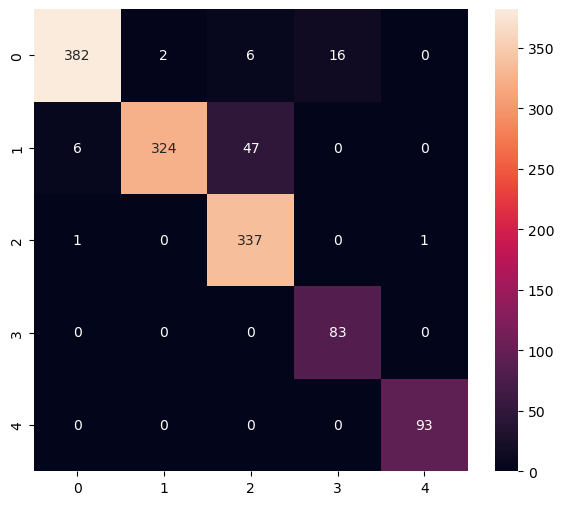

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       406
           1       0.99      0.86      0.92       377
           2       0.86      0.99      0.92       339
           3       0.84      1.00      0.91        83
           4       0.99      1.00      0.99        93

    accuracy                           0.94      1298
   macro avg       0.93      0.96      0.94      1298
weighted avg       0.95      0.94      0.94      1298



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmp9ch4u0a_/assets


INFO:tensorflow:Assets written to: /tmp/tmp9ch4u0a_/assets


Saved artifact at '/tmp/tmp9ch4u0a_'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  140377890556240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140377890557200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140377890556816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140377890554320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140377885734288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140377885733712: TensorSpec(shape=(), dtype=tf.resource, name=None)


2025-03-25 12:00:33.226505: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmp9ch4u0a_
2025-03-25 12:00:33.227021: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-03-25 12:00:33.227031: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmp9ch4u0a_
2025-03-25 12:00:33.263137: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-03-25 12:00:33.283466: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmp9ch4u0a_
2025-03-25 12:00:33.290009: I tensorflow/cc/saved_model/loader.cc:466] SavedModel load for tags { serve }; Status: success: OK. Took 63504 microseconds.
2025-03-25 12:00:33.299454: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


6600

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 68 μs, sys: 60 μs, total: 128 μs
Wall time: 128 μs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.7471026e-02 6.1964855e-02 9.1056371e-01 2.9183573e-07 5.5238186e-08]
2
